In [38]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import Sequential,layers,experimental

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
!ls /kaggle/input/eye-dataset/train_dataset

closedLeftEyes	 closed_eye.jpg  openRightEyes
closedRightEyes  openLeftEyes	 open_eye.jpg


In [6]:
path = '/kaggle/input/eye-dataset/train_dataset'
closedLeftEyes = path + '/closedLeftEyes'
openLeftEyes =path + '/openLeftEyes'
closedRightEyes = path + '/closedRightEyes'
openRightEyes = path + '/openRightEyes'

In [7]:
def plot_image(eyes,limit=5):
    for img in os.listdir(eyes)[:limit]:
        image = eyes+'/'+img
        image = cv2.imread(image)
        plt.matshow(image)
        plt.show()
        print(image.shape)

# **5 OpenLeftEye Images**

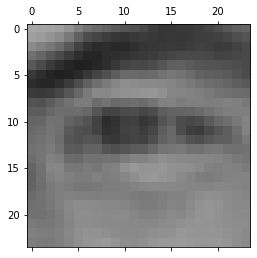

(24, 24, 3)


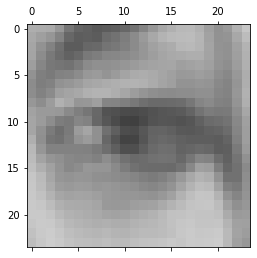

(24, 24, 3)


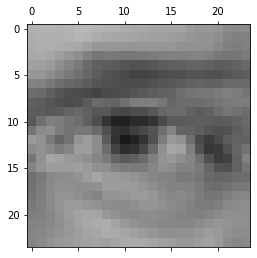

(24, 24, 3)


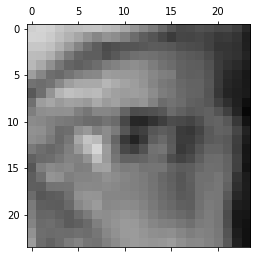

(24, 24, 3)


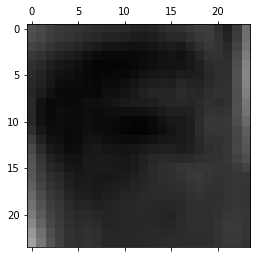

(24, 24, 3)


In [8]:
plot_image(openLeftEyes)

# **5 OpenRightEye Images**

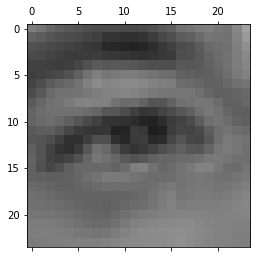

(24, 24, 3)


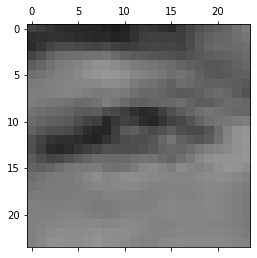

(24, 24, 3)


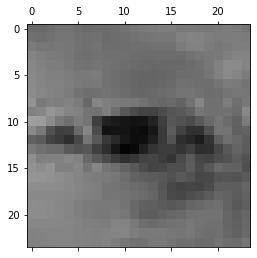

(24, 24, 3)


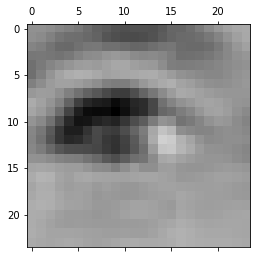

(24, 24, 3)


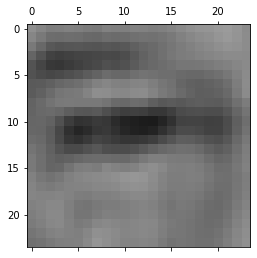

(24, 24, 3)


In [9]:
plot_image(openRightEyes)

# **5 ClosedLeftEye Images**

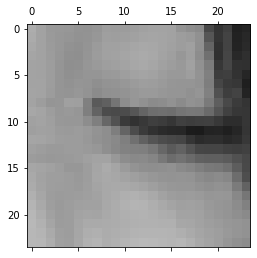

(24, 24, 3)


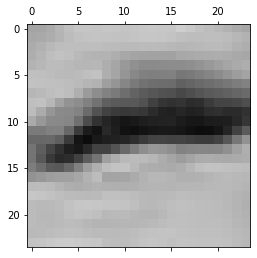

(24, 24, 3)


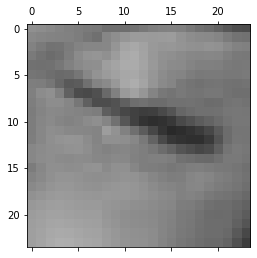

(24, 24, 3)


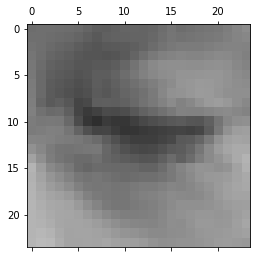

(24, 24, 3)


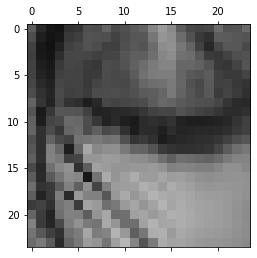

(24, 24, 3)


In [10]:
plot_image(closedLeftEyes)

# **5 ClosedRightEye Images**

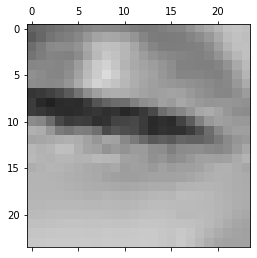

(24, 24, 3)


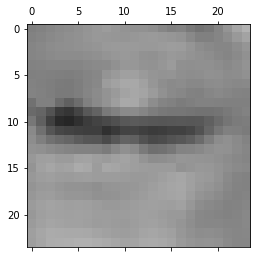

(24, 24, 3)


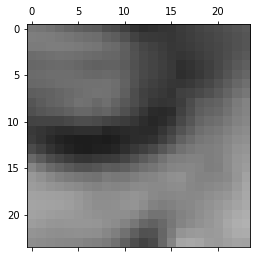

(24, 24, 3)


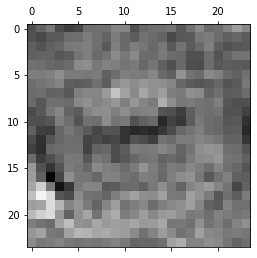

(24, 24, 3)


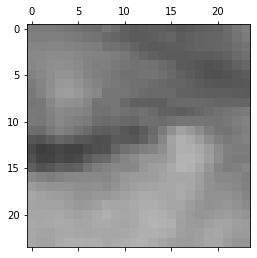

(24, 24, 3)


In [11]:
plot_image(closedRightEyes,5)

In [12]:
len(os.listdir(openLeftEyes) + os.listdir(openRightEyes))

2464

In [13]:
len(os.listdir(closedLeftEyes) + os.listdir(closedRightEyes))

2386

# **Separating open and closed eyes**

In [14]:
open_eyes = []
closed_eyes = []

In [15]:
def append_open(eyes):
    i = 0
    for img in os.listdir(eyes):
        image = eyes+'/'+img
        image = cv2.imread(image)
        if (image is not None):
            if image.shape == (24,24,3):
                open_eyes.append(image)
                i += 1
    print("Count:",i)
def append_closed(eyes):
    i = 0
    for img in os.listdir(eyes):
        image = eyes+'/'+img
        image = cv2.imread(image)
        if (image is not None):
            if image.shape == (24,24,3):
                closed_eyes.append(image)
                i += 1
    print("Count:",i)

In [16]:
append_open(openLeftEyes)
append_open(openRightEyes)

Count: 1231
Count: 1231


In [17]:
append_closed(closedLeftEyes)
append_closed(closedRightEyes)

Count: 1192
Count: 1192


# **Labels for open and closed eyes**

In [18]:
len(open_eyes), len(closed_eyes)

(2462, 2384)

In [19]:
# open = 1
# closed = 0
open_labels = [ 1 for i in range(len(open_eyes)) ]
close_labels = [ 0 for i in range(len(closed_eyes)) ]

In [20]:
len(open_labels), len(close_labels)

(2462, 2384)

# **Combining open and closed eyes data**

In [21]:
data = open_eyes+closed_eyes
x = np.array(data)/255 #Scaling

In [22]:
x.shape

(4846, 24, 24, 3)

# **Combining open and closed eyes label data**

In [23]:
data2 = open_labels+close_labels
y = np.array(data2)

In [24]:
y.shape

(4846,)

# **Splitting the data**

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3392, 24, 24, 3), (1454, 24, 24, 3), (3392,), (1454,))

In [26]:
pd.Series(y_train).value_counts()

1    1721
0    1671
dtype: int64

In [27]:
pd.Series(y_test).value_counts()

1    741
0    713
dtype: int64

# **Model Building and Predictions**

In [48]:
model = Sequential([
    layers.Conv2D(filters=24, kernel_size=(3,3),activation='relu',input_shape=(24,24,3)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=48, kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(48, activation='relu'),
    layers.Dense(1,activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [49]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
106/106 [==============================] - 1s 2ms/step - loss: 0.5967 - accuracy: 0.6825
Epoch 2/20
106/106 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8837
Epoch 3/20
106/106 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9278
Epoch 4/20
106/106 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9331
Epoch 5/20
106/106 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9430
Epoch 6/20
106/106 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9479
Epoch 7/20
106/106 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9578
Epoch 8/20
106/106 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9591
Epoch 9/20
106/106 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9642
Epoch 10/20
106/106 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9649

In [50]:
model.evaluate(x_test,y_test)

46/46 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9574


[0.12906956672668457, 0.9573590159416199]

In [44]:
def predict(x):
    pred = model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def plot_cm(yt,yp,title=None):
    cm = confusion_matrix(yt,yp)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm,annot=True,fmt='g')
    plt.title(title)
    plt.show()
    

In [51]:
y_pred_test = predict(x_test)
y_pred_train = predict(x_train)

# **Classification reports**

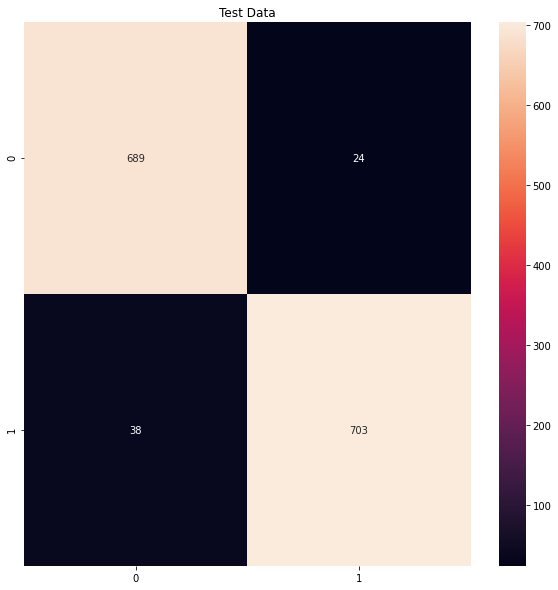

In [52]:
plot_cm(y_test, y_pred_test,title='Test Data')

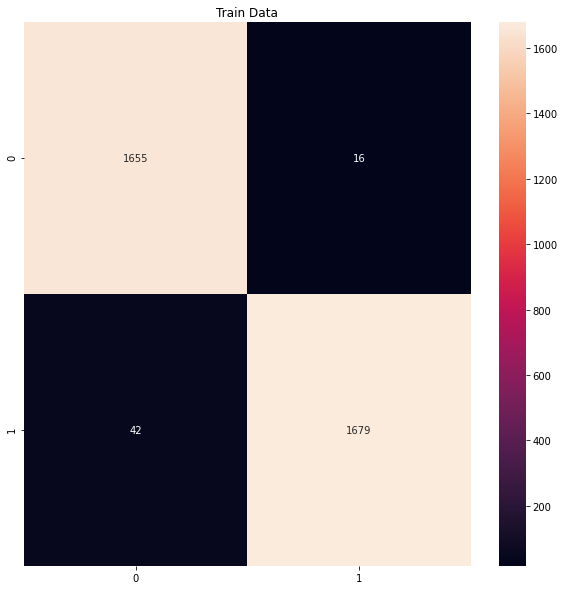

In [53]:
plot_cm(y_train, y_pred_train,title='Train Data')

In [54]:
print("Test Data Report")
print(classification_report(y_test,y_pred_test))

Test Data Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       713
           1       0.97      0.95      0.96       741

    accuracy                           0.96      1454
   macro avg       0.96      0.96      0.96      1454
weighted avg       0.96      0.96      0.96      1454



In [55]:
print("Train Data Report")
print(classification_report(y_train,y_pred_train))

Train Data Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1671
           1       0.99      0.98      0.98      1721

    accuracy                           0.98      3392
   macro avg       0.98      0.98      0.98      3392
weighted avg       0.98      0.98      0.98      3392



# **Saving Model as file**

In [56]:
model.save("Eye-detect-model")